<a href="https://colab.research.google.com/github/KBryt/MSc_Financial_Engineering/blob/main/GWPFE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Work Project 1 - Financial Econometrics (MScFE)

In [2]:
#%matplotlib inline

import numpy as np
import pandas as pd
from datetime import date, timedelta
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# 1. Skewness

In [1]:
$\frac{{\sum_{i=1}^n (X_i - \bar{X})^3 \cdot p_i}}{{n \cdot \sigma^3}}$

SyntaxError: ignored

**1.1 Definition:**
A statistical measure of the asymmetry of a normal distribution is called skewness. According to Ramsey and Schafer (2013), a normal distribution usually exhibits perfect symmetry, showing neither a lean to the left nor a lean to the right. However, deviations from this perfect symmetry suggest that the distribution is skewed to one side, leading to an asymmetry of some type, usually indicated by the distribution's skewness. According to math, a distribution's skewness can be determined as follows (Wooldridge, 2019):
$\frac{{\sum_{i=1}^n (X_i - \bar{X})^3 \cdot p_i}}{{n \cdot \sigma^3}}\$

where X = random variable; and Xi= ith random variable;  X = mean of distribution; n = number of variables in the distribution;  = standard deviation. Following the formula, a distribution is said to be symmetric about zero when it has a symmetric distribution.

**1.2 Description:**
A distribution of data's asymmetry or lack of symmetry is measured by its skewness. A distribution is said to be skew if the data are not distributed uniformly, which prevents the normal distribution from having a mirror image on both sides. Because the majority of the data is concentrated on the left, a positively skewed distribution has a longer tail on the right side; a negatively skewed distribution has the opposite effect. In order to comprehend the properties of a dataset, skewness is frequently employed in statistical analysis and exploratory data analysis. It offers important insights into the structure of a distribution.

**1.3 Demonstration:**
We use real-world examples of the distribution of daily returns of cryptocurrencies like Dogecoin (DOGE_USD) and Bitcoin (BTC_USD) between 2020 and 2023 from the Yahoo Finance website to show the skewness of a normal distribution. These cryptocurrencies were our choice because of their significant annual volatility. View the detailed statistics of the chosen coins below.

The next table, labeled "Descriptive Statistics for the Daily Percentage Returns," indicates that the skewness of the daily returns for Bitcoin is comparatively close to zero. The daily returns of Dogecoin are significantly positively biased, up to 17, in comparison to Bitcoin. These daily returns display two identical financial instruments with varying skewness.

**1.4 Diagram:**
In the diagrams below, we show the histogram of the returns for these two cryptocurrencies. The diagram below confirms that the daily returns of Dogecoin are positively skewed, while the daily returns of Bitcoin are relatively perfectly skewed, although slightly positive.

**1.5	Diagnosis:**
The skewness of a distribution can be determined using the tests listed below: (i) Statistical descriptions: To do this, use the formula found in Section 1.1. A set of data that is balanced would have 0% skewness. Conversely, a positively skewed set of data will have a skewness greater than 0, whilst the opposite is true; (ii) Examining a frequency plot or histogram visually: Here, the general guideline is to heed the distribution's label, which indicates whether it is favorably skewed to the right or negatively skewed to the left; (iii) Utilizing Box and QQ Plots: A box plot will show the magnitude of outliers in addition to central tendencies. The median will be lower than the mean in a positively skewed distribution, and the box plot's right whiskers will be longer. Moreover, the opposite is true. Quantiles in a dataset are compared to those of a normal distribution using QQ plots. The data may be skewed if there is a divergence from the straight line.

**1.6	Damage:**
There are many unmet expectations in a skewed distribution. This is because it results in: (i) skewed estimates as a result of anomalies in the dispersion and central tendency measures. A right-skewed distribution, for instance, usually has a mean that is higher than its median; (ii) the existence of outliers and extreme values, which can result in violations of the normality assumption; (iii) the unreliability of hypothesis testing primarily because of the violations of the normality assumptions; (iv) inaccurate interpretation of the results, since a slight change in one variable can have a major impact on another.

**1.7	Directions:**
As stated by Ramsey & Schafer (2013), Moore, McCabe & Craig (2018), and Wooldridge (2019), there are a number of strategies to address some of the damages mentioned above. The use of non-parametric statistical techniques that do not presuppose a particular distribution; the application of robust statistical methods that are less susceptible to outliers and deviations from normalcy; data transformations such as logarithmic, square root, and reciprocal transformations to smooth the distribution of the data; Using classification and grouping to reduce the influence of a few extreme values or outliers in a distribution is known as; using resampling techniques like bootstrapping to assess statistics and produce confidence intervals is known. Using bootstrapping, we are able to produce estimates that are more resilient to data skewness; the selection of tactical statistical methods that are more resilient to data skewness.


In [4]:
### Step 1: Crypotcurrency Data from Yahoo finance
(a) **Bitcoin (BTC-USD)**
(b) **Dogecoin (DOGE-USD)**

SyntaxError: ignored

In [5]:
def stock_Data(ls,start_date,end_date):
    data=pd.DataFrame()
    for i in ls:
        st=yf.download(i, start=start_date, end=end_date)["Adj Close"]
        st=st.reindex(st.index.strftime('%Y/%m/%d')).rename(i)
        data=pd.concat([data,st],axis=1)
    return data

In [6]:
# Define the stocks and the time period for which you want to pull data
stock = ["BTC-USD","DOGE-USD"]
end_date = date.today()
start_date = end_date - timedelta(days=365.25*3)

In [7]:
df=stock_Data(stock,start_date,end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
port=df.dropna(axis = 0, how = 'any')
port

,BTC-USD,DOGE-USD
2020/11/27,17108.402344,0.003275
2020/11/28,17717.414062,0.003405
2020/11/29,18177.484375,0.003448
2020/11/30,19625.835938,0.003551
2020/12/01,18802.998047,0.003335
...,...,...
2023/11/21,35813.812500,0.072119
2023/11/22,37432.339844,0.075784
2023/11/23,37289.621094,0.076200
2023/11/24,37720.281250,0.078217


## Daily Percentage Returns

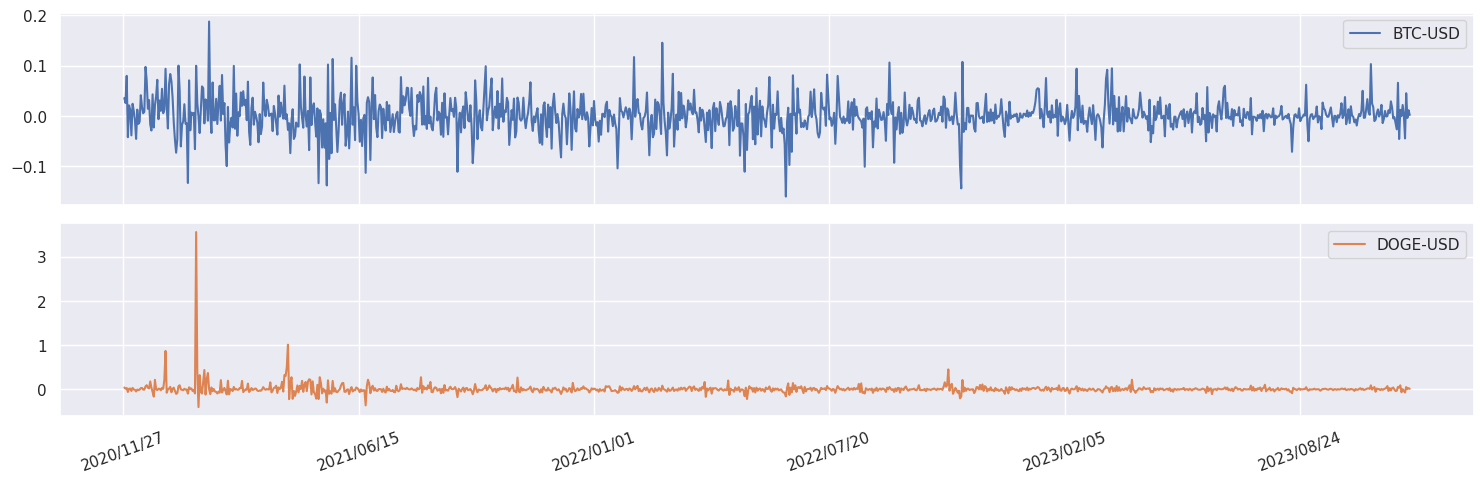

In [9]:
returns=port.pct_change()
returns.plot(subplots=True, figsize =(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## Descriptive Statistics for the Daily Percentage Returns

In [10]:
ret=returns.mean(axis=0).rename('Mean Daily Returns')
var=returns.var(axis=0).rename('Variance')
std=returns.std(axis=0).rename('Standard Deviation')
skew = returns.skew(axis=0).rename('Skewness')
kurt = returns.kurt(axis=0).rename ('Kurtosis')
stats = pd.concat([ret,var,std,skew,kurt],axis=1)
stats

,Mean Daily Returns,Variance,Standard Deviation,Skewness,Kurtosis
BTC-USD,0.001308,0.001166,0.034154,0.075962,3.286858
DOGE-USD,0.007528,0.017809,0.133452,18.030126,462.469179


## Distribution of Selected Cryptocurrencies

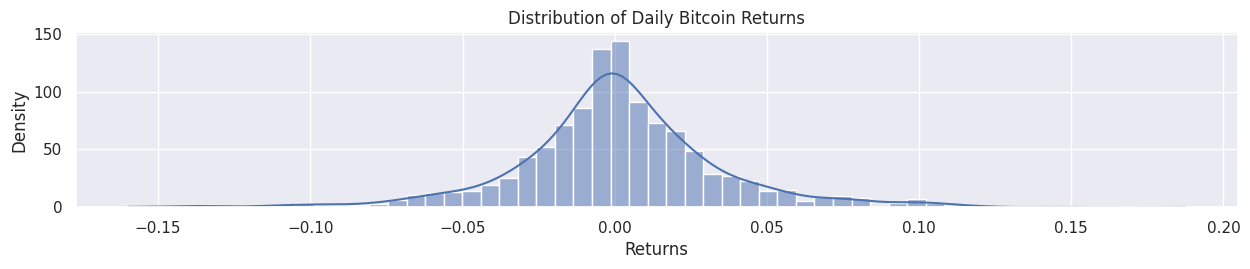

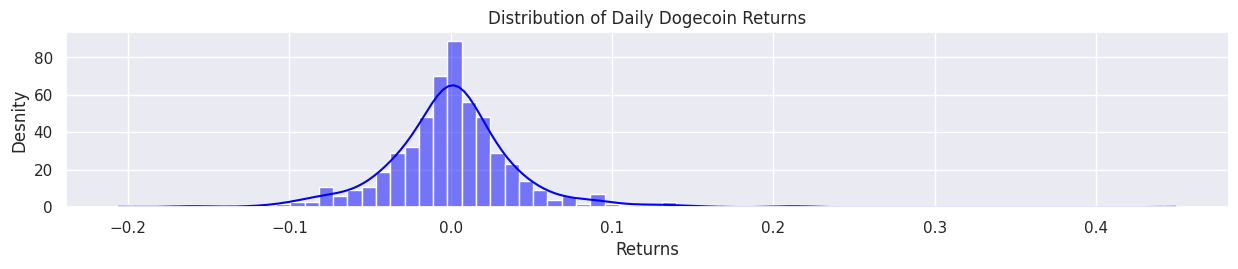

In [11]:
# Plot the histogram of Daily Bitcoin Returns
# First histogram
ax1=plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
sns.histplot(returns[:len(returns)//1], x="BTC-USD", kde=True)
plt.title("Distribution of Daily Bitcoin Returns")
plt.xlabel("Returns")
plt.ylabel("Density")

# Second histogram of Daily Dogecoin Returns
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 2)
sns.histplot(returns[len(returns)//2:], x='DOGE-USD', color='blue', kde=True)
plt.title("Distribution of Daily Dogecoin Returns")
plt.xlabel("Returns")
plt.ylabel("Desnity")

plt.show()

# **2. Kurtosis / Heteroscedasticity**




**2.1	Definition**
Kurtosis is a statistical measure used to assess the shape of a distribution's tails. It compares the distribution to a normal distribution and determines whether the tails are heavier or lighter. This measure helps identify the presence of extreme price movements and fat tails in the context of volatility modeling (Tsay, 2005).
Kurtosis = $\frac{{(n - 1) \cdot E[(x - \mu)^4]}}{{\sigma^4}} $

Where n is the number of data points, µ is the mean of the data points and σ is the standard deviation of the data points.
On the other hand, heteroscedasticity refers to the unequal or varying levels of volatility observed in a time series. It implies that the volatility does not remain constant over time, leading to periods of both high and low volatility (Campbell et al., 1997).
Heterogeneity = σ^2 / µ^2
Where σ is the standard deviation of the data points and µ is the mean of the data points.

**2.2 Description**
In volatility modeling, high kurtosis indicates a higher likelihood of extreme events compared to a normal distribution. This suggests the presence of significant price movements and fat tails, which need to be considered for accurate risk assessment.
Heteroscedasticity, on the other hand, signifies that the volatility itself is not consistent over time. This time-varying nature of volatility can have implications on the modeling and estimation of risk measures, potentially leading to inaccurate results.

**2.3	Demonstration**
To demonstrate the challenges of kurtosis and heteroscedasticity, we will use simulated financial data. Specifically, we will work with a dataset containing daily returns of a stock over a specific time period.

**2.4	Diagram**
The diagrams will show the histogram of the distribution of daily returns and time series plot of daily returns highlighting periods of high and low volatility. It will provide a visual representation of the varying levels of volatility.

**2.5	Diagnosis**
From the histogram we can infer that the kurtosis of the distribution is likely close to that of a normal distribution. The absence of extremely heavy or light tails suggests that the distribution does not deviate significantly from a normal distribution in terms of kurtosis.
The time series plot shows significant variations and fluctuations in volatility, it suggests the presence of heteroscedasticity. Patterns of changing volatility indicate that the volatility is not constant and varies across different time periods.

**2.6	Damage**
Neglecting the impact of high kurtosis can result in underestimating the potential risk associated with extreme events. This can lead to inadequate hedging strategies and inaccurate valuation of derivatives.
Similarly, disregarding heteroscedasticity can introduce bias in volatility estimates and affect the accuracy of risk measures. Pricing models, hedging strategies, and risk management decisions may be compromised as a result.

**2.7	Directions**
To address kurtosis, one approach is to explore models that account for fat-tailed distributions, such as generalized autoregressive conditional heteroskedasticity (GARCH) models. GARCH models incorporate the phenomenon of volatility clustering and capture the time-varying nature of volatility, providing a more accurate representation of the data (Tsay, 2005).
For dealing with heteroscedasticity, heteroscedasticity-robust estimation techniques like generalized least squares (GLS) or weighted least squares (WLS) can be employed. These methods adjust for varying levels of volatility, leading to more reliable estimates (Campbell et al., 1997).


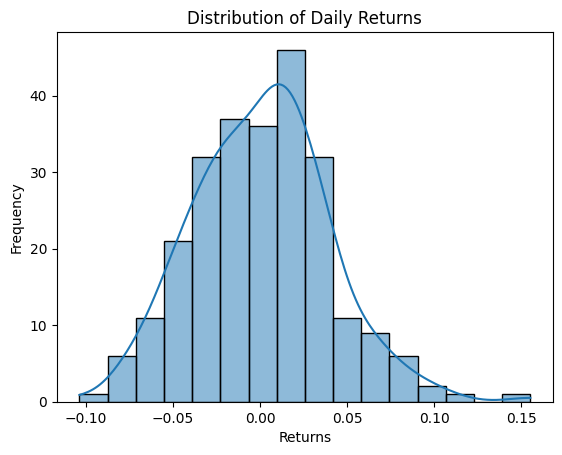

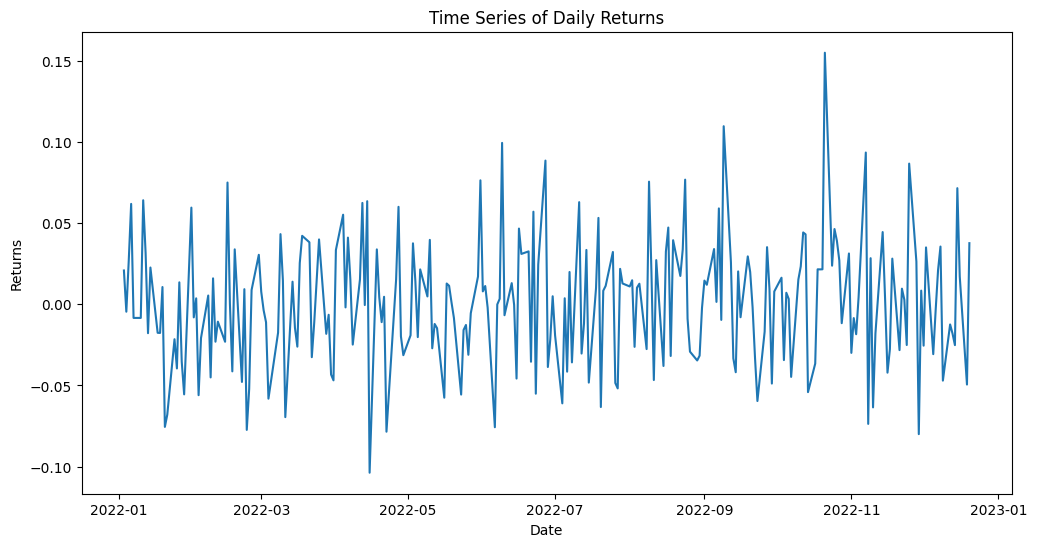

In [ ]:
#  Illustrating the challenges of kurtosis and heteroscedasticity, considering a simulated dataset comprising of daily returns of a stock over a period of time

import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
# Set the seed value for NumPy random number generator
np.random.seed(42)

# Set the seed value for Python random number generator
random.seed(42)

# Set the parameters
mean_return = 0.001  # Mean return of the stock
volatility = 0.04   # Volatility of the stock

# Set the number of trading days
num_days = 252

# Generate the daily returns
returns = np.random.normal(mean_return, volatility, num_days)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram of returns
sns.histplot(returns, kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()

# Generate the dates for the time series
dates = pd.date_range(start='2022-01-01', periods=num_days, freq='B')

# Create a DataFrame with dates and returns
df = pd.DataFrame({'Date': dates, 'Returns': returns})

# Plot the time series of returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Returns'])
plt.title("Time Series of Daily Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.show()

# 2. Non-Stationarity

**4.1 Definition:**
The distribution of these two cryptocurrencies' prices in levels, or their raw form, is non-stationary since it does not follow any pattern, as we demonstrate in Panel A of the diagrams below. But when we look at panel B's first difference, we can see that their trends become mean-reverting and, consequently, stationary. 4.1 Explanation
To put it simply, stationarity is a property of time series processes that implies stability due to the time-invariant nature of the series. Because of the constant mean, constant variance, and constant autocovariances for each lag, non-stationarity implies that a time series is time-variant over time (Gujarati, 2018; Brooks, 2019; Wooldridge, 2019).  In terms of mathematics, non-stationarity is explained by the following two models: The random walk model with drift (i) and the trend-stationary process (ii) are the two models.

**4.2 	Description:**
When a set of statistical characteristics, such as mean and variance, follow a particular trend over time rather than being randomly distributed, it's referred to as non-stationarity. It is problematic when a time series is non-stationary because it makes it impossible to forecast or precisely estimate statistical measures. For time series analysis and forecasting to be accurate, non-stationarity must be recognized and addressed. Inaccurate predictions and misleading results can result from neglecting to take non-stationarity into account. Using pre-processing methods and selecting models that are suitable for non-stationary data are essential steps when working with time series that exhibit changing statistical properties.

**4.3	Demonstration:**
We use actual examples of the prices of cryptocurrencies between 2020 and 2023 from the Yahoo Finance website, such as Bitcoin (BTC_USD) and Dogecoin (DOGE_USD), to show the non-stationarity of a time series. The reason cryptocurrencies caught our attention is that they have experienced significant fluctuations over time.

**2.4	Diagram**
The time series plot of daily returns and the histogram of the distribution of daily returns will be displayed in the diagrams, emphasizing times of high and low volatility. It will give an illustration of the various degrees of volatility.

**2.5	Diagnosis**
The histogram suggests that the distribution's kurtosis is probably quite similar to a normal distribution. The distribution does not appear to differ significantly from a normal distribution in terms of kurtosis, unless there are exceptionally heavy or light tails present.
There appears to be heteroscedasticity in the time series plot, which displays notable volatility variations and fluctuations. The volatility is not constant and varies over different time periods, according to patterns of changing volatility.

**2.6	Damage**
The potential risk associated with extreme events may be underestimated if the influence of high kurtosis is overlooked. Inaccurate derivatives valuation and insufficient hedging strategies may result from this.
Analyzing heteroscedasticity in the same way can lead to bias in volatility estimates and compromise the precision of risk measures. This could lead to decisions about risk management, hedging tactics, and pricing models being jeopardized.

**2.7	Directions**
Examining models that take fat-tailed distributions into account, like generalized autoregressive conditional heteroskedasticity (GARCH) models, is one way to address kurtosis. More accurate data representation is achieved by GARCH models, which take into account the phenomenon of volatility clustering and capture the time-varying nature of volatility (Tsay, 2005).
Heteroscedasticity-robust estimation methods such as weighted least squares (WLS) or generalized least squares (GLS) can be used to handle heteroscedasticity. By accounting for different degrees of volatility, these techniques produce estimates that are more trustworthy (Campbell et al., 1997).



## Daily Prices of Bitcoin and Dogecoin between 2020 and 2023

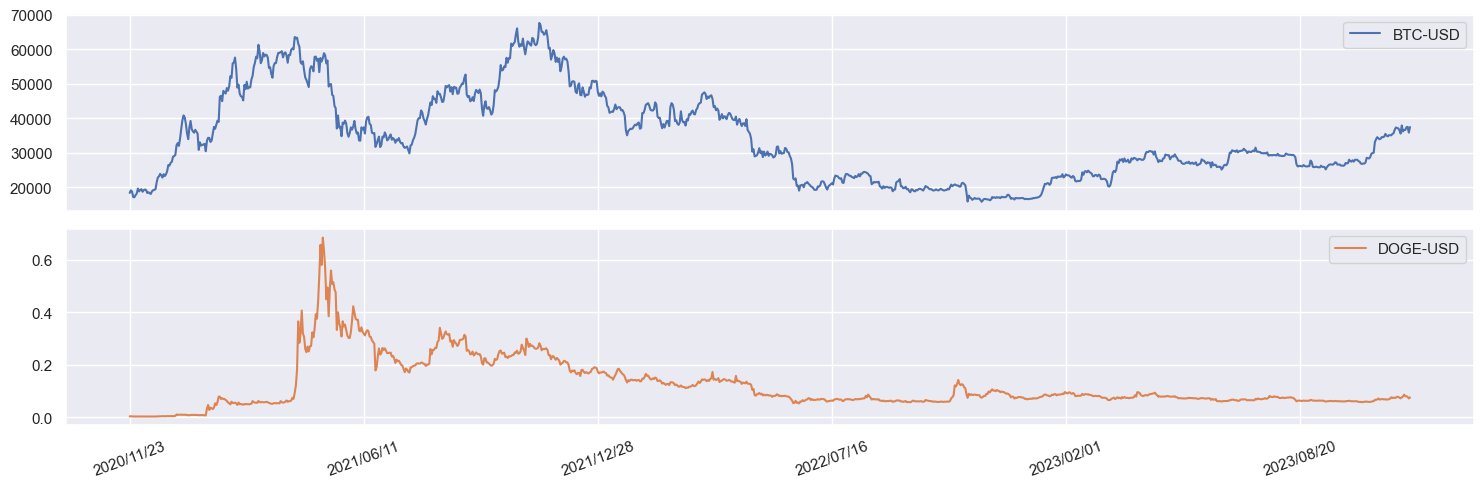

In [ ]:
port.plot(subplots=True, figsize =(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## Descriptive Statistics for the Daily Prices of Bitcoin and Dogecoin

In [ ]:
prices=port.mean(axis=0).rename('Mean Daily Prices')
var=port.var(axis=0).rename('Variance')
std=port.std(axis=0).rename('Standard Deviation')
skew = port.skew(axis=0).rename('Skewness')
kurt = port.kurt(axis=0).rename ('Kurtosis')
stats = pd.concat([ret,var,std,skew,kurt],axis=1)
stats

,Mean Daily Returns,Variance,Standard Deviation,Skewness,Kurtosis
BTC-USD,0.001238,1.623575e+08,12741.957901,0.602881,-0.612811
DOGE-USD,0.007409,9.458795e-03,0.097256,1.842901,4.483235


## First Difference of Daily Prices of Bitcoin and Dogecoin between 2020 and 2023

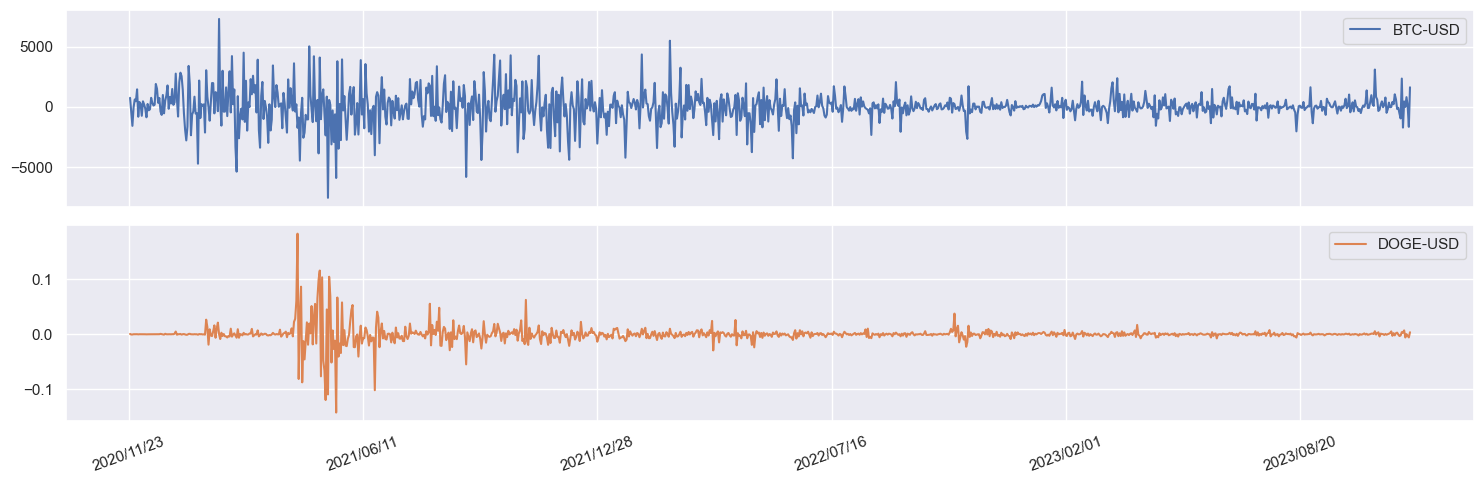

In [ ]:
port_firstdiff=port.diff()
port_firstdiff.plot(subplots=True,figsize=(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## Second Difference of Daily Prices of Bitcoin and Dogecoin between 2020 and 2023

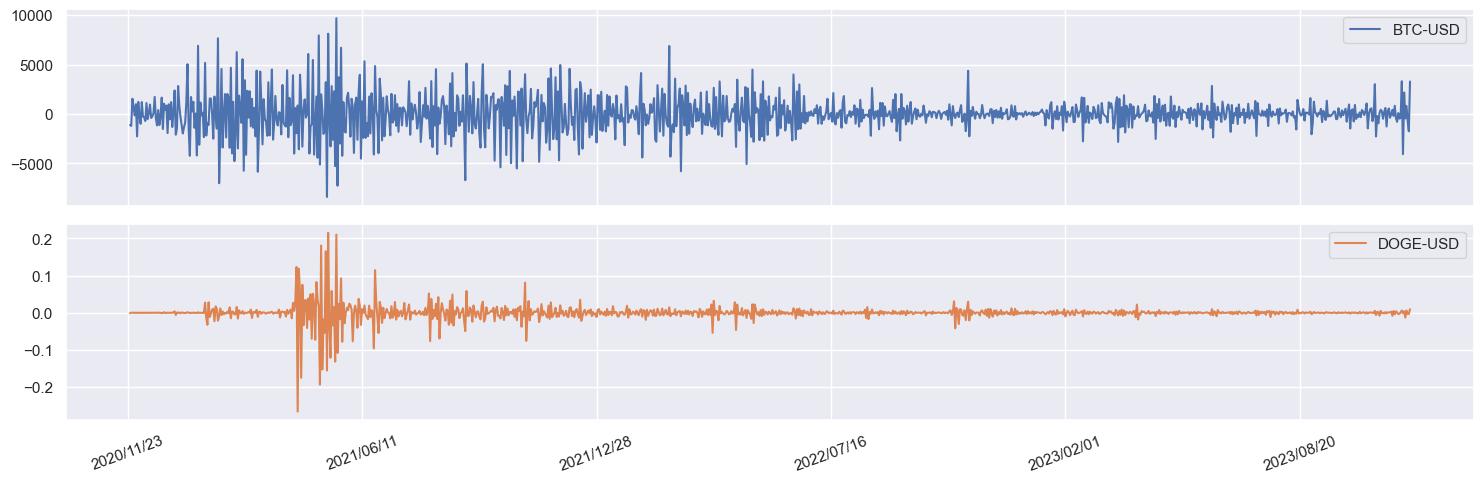

In [ ]:
port_seconddiff=port_firstdiff.diff()
port_seconddiff.plot(subplots=True, figsize=(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [ ]:
**4.5	Diagnosis:**
To diagnose whether a time series is non-stationary, the following approaches can be employed: (i) visual inspection of a trend such that if we find that the trend is not mean-reverting, we suspect that the data is non-stationary; (ii) the augmented dickey-fuller (ADF) test with the null hypothesis of the existence of a unit root (that is, non-stationarity). So we want to reject the null  hypothesis if the p-value of the test is below a chosen significance level; ; (iii) the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) and Phillips-Perron (PP) tests. The tests use different test statistic(s), but the procedure of hypothesis testing is similar to that discussed for the ADF test.

**4.6	Damage:**
Just like a skewed distribution, a non-stationary time series leaves a lot to be desired. This is because it leads to: (i) the measurement of inaccurate statistical measures such as means, variances, and correlations, thereby making it impossible to obtain reliable estimates; (ii) difficulty in differentiating between genuine trends or patterns and spurious relationships; (iii) unreliable forecasts as historical data that are non-stationary cannot accurately predict future values; (iv) spurious regression, which is asymptomatic of a situation where both the dependent and independent variables are non-stationary, creating a misleading relationship due to the presence of common trends or patterns; (v) violations of the assumptions of linear regression or autoregressive integrated moving average (ARIMA) models. These in turn culminate in unreliable model outputs, biased parameter estimates etc.

**4.7	Directions:**
To address some of the damages highlighted above, here are a few techniques (Gujarati, 2018; Brooks, 2019): (i) differencing, which ordinarily means taking the difference between consecutive observations. Differencing helps to detrend the data by removing patterns that cause non-stationarity. Such differencing can be done multiple times; (ii) applying mathematical transformations that help introduce stationarity, e.g., the logarithmic or box-cox transformation; (iii) making seasonal adjustments that are responsible for non-stationarity, e.g., seasonal decomposition of time series; (iv) detrending the data by fitting a regression model to help generate and extract the residuals, which represent the detrended series. Detrending can help eliminate the trend component and make the data stationary; (v) the use of model-based approaches  where specific time series models like the ARIMA models that naturally incorporate differencing to achieve stationarity.


#4. Sensitivity to Outliers

##4.1 Definition:
According to the National Institute of Standards and Technology, an outlier is “an observation that lies an abnormal distance from other values in a random sample from a population”. (NIST)
Commonly, outliers are identified using Tukey Fences (John), where the lower fence is 1.5 times the Interquartile Range (IQR) below the 25th percentile, and the upper fence is 1.5 times the IQR above the 75th percentile.
##4.2 Description:
In a dataset, outliers are data points that deviate markedly from the majority, possibly due to measurement errors or representing extreme cases. While there isn't a strict definition, a common approach involves measuring the IQR, the range between the 25th percentile (Q1) and the 75th percentile (Q3), with data points beyond the range (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) considered outliers.
##4.3 Demonstration
Using 1 year BTC-USD return data, we can calculate relevant parameters and find outliers. Here is the summary:
Q1 = -0.014,  Q3 = 0.017Interquartile Range (IQR) = 0.031
Lower Fence = -0.061, Upper Fence = 0.064
Number of outliers = 86, Total data points = 1095, Percentage of outliers = 0.079


In [ ]:
# Import BTC-USD data and transform price into returns
stock = ["BTC-USD"]#,"DOGE-USD"]
end_date = date.today()
start_date = end_date - timedelta(days=365.25*3)
df=stock_Data(stock,start_date,end_date)
df_return = df.pct_change()
df_return.columns=["BTC_Return"]
df_return.head()

[*********************100%%**********************]  1 of 1 completed


,BTC_Return
2020/11/26,NaN
2020/11/27,-0.002462
2020/11/28,0.035597
2020/11/29,0.025967
2020/11/30,0.079678


In [ ]:
# Calculate Q1, median and Q3
Q1, median, Q3 = df_return.quantile([0.25, 0.5, 0.75]).values.reshape(-1)
IQR = Q3 - Q1
print(f"Q1: {Q1: .3f}, Median: {median: .3f}, Q3: {Q3: .3f}")
print(f"Interquantile Range (IQR): {IQR: .3f}")

# Find "fences"
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR
print(f"Lower Fence: {lower_fence: .3f}, Upper Fence: {upper_fence: .3f}")

# Find outliers
num_outliers = ((df_return < lower_fence) | (df_return > upper_fence)).sum().values[0]
print(f"Number of outliers: {num_outliers}, Total data points: {len(df_return)}, Percentage: {num_outliers/len(df_return): .3f}")

Q1: -0.014, Median: -0.000, Q3:  0.017
Interquantile Range (IQR):  0.031
Lower Fence: -0.061, Upper Fence:  0.064
Number of outliers: 86, Total data points: 1095, Percentage:  0.079


##4.4 Diagram
Boxplot is the most commonly used visualization to identify outliers, first introduced in 1970 by John Tukey. ("Box Plot") The box represents the IQR, the middle line is the median, and whiskers extend to 1.5 times the IQR. Outliers are depicted as rhombus shapes beyond this range.


Text(0.5, 1.0, 'Box Plot for BTC Return')

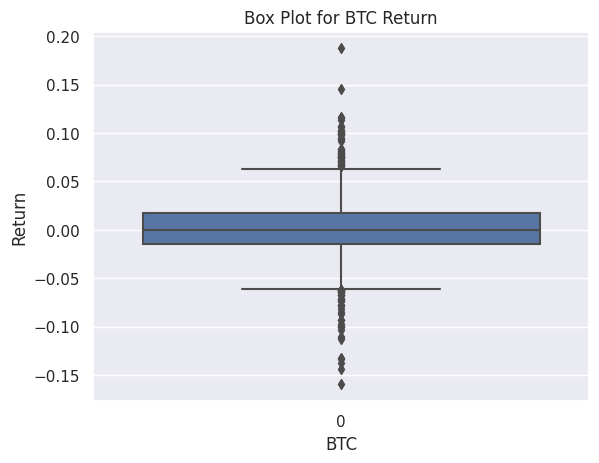

In [ ]:
sns.boxplot(data=df_return["BTC_Return"])
plt.xlabel("BTC")
plt.ylabel("Return")
plt.title("Box Plot for BTC Return");

##4.5 Diagnosis:
A common way to find outliers is to use Tukey’s Fences with the following steps:
Sort the data points in ascending order.
Find Q1 (25th percentile) and Q3 (75th percentile).
Calculate interquartile range IQR = Q3 - Q1.
Calculate lower fence = Q1 - 1.5* IQR and upper fence = Q3 + 1.5*IQR.
Any data point less than lower fence or larger than upper fence is an outlier.
Alternative methods include z-scores or statistical criteria based on residuals.
##4.6 Damage
While modeling volatility, outliers can damage the accuracy and reliability of the model and lead to many problems:
Biased volatility estimation: The presence of outliers can disproportionately influence the estimation of volatility. Any modeling approach relying on absolute return or squared residuals can be significantly influenced by outliers.
Unreliable risk measurement: Volatility is a crucial component in measuring risks. Extreme returns (outliers) can distort volatility measures and damage the credibility of such risk measurements.
Unstable model: Outliers can disrupt the normal dynamics assumed by the model, making the estimation inconsistent or failing to converge.
##4.7 Directions
To address the problem caused by outliers in volatility modeling, several robust models can be considered:
Robust GARCH: Robust GARCH models, such as RGARCH, incorporate robust estimation techniques to reduce the impact of outliers on volatility estimates.(Boudt et al.)  These models use robust loss functions, like Huber or Tukey biweight, instead of the standard squared loss function in GARCH models.
Stochastic Volatility Models: Stochastic volatility models, such as the Heston model, explicitly model the volatility as a stochastic process, allowing for flexibility in capturing complex volatility patterns. (Krichene) These models can be less sensitive to outliers because they do not assume constant volatility over time.
Nonparametric Models: Kernel-based approaches, such as Kernel Density Estimation (KDE) or Local Volatility Models, do not rely on strict parametric assumptions about the distribution of returns. These models can be less sensitive to outliers.


# Bibliography:
"7.1.6. What Are Outliers in the Data?" National Institute of Standards and Technology, www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm. Accessed 26 Nov. 2023.

Boudt, Kris, et al. “Robust Forecasting of Dynamic Conditional Correlation GARCH Models.” SSRN Electronic Journal, Elsevier BV, 2010. Crossref, doi:10.2139/ssrn.1721421.

"Box Plot." Wikipedia, Wikimedia Foundation, 19 Nov. 2023, en.wikipedia.org/wiki/Box_plot. Accessed 26 Nov. 2023.

John, Tukey. Exploratory Data Analysis. 1st ed., Pearson, 1977.
Krichene, Noureddine. “Modeling Stochastic Volatility with Application to Stock Returns.” SSRN Electronic Journal, Elsevier BV, 2003. Crossref, doi:10.2139/ssrn.879201.
